In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [18]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

In [19]:
# Quickly check to see the size of our DF, both rows and columns
df.size

12367110

In [9]:
df.shape

(34545, 358)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [10]:
# your code here
df['_STATE'].unique()

array([ 9., 34., 36.])

Now check to see how large our subset df.

In [11]:
# your code here

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [12]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [13]:
#your code here
zero_dict = {88:0, 77:np.nan, 99:np.nan}
df['PHYSHLTH'] = df['PHYSHLTH'].replace(zero_dict)
df['PHYSHLTH']

49938      0.0
49939      0.0
49940      2.0
49941      0.0
49942      0.0
49943      0.0
49944      0.0
49945      0.0
49946     28.0
49947      0.0
49948      0.0
49949      0.0
49950      5.0
49951      0.0
49952      2.0
49953      2.0
49954      0.0
49955     30.0
49956      0.0
49957      0.0
49958      0.0
49959      0.0
49960      0.0
49961      0.0
49962      0.0
49963      0.0
49964      5.0
49965      4.0
49966      0.0
49967      2.0
          ... 
303749     0.0
303750     3.0
303751    30.0
303752     2.0
303753     0.0
303754     1.0
303755     0.0
303756     3.0
303757     2.0
303758     2.0
303759     1.0
303760     6.0
303761     0.0
303762     1.0
303763    15.0
303764     0.0
303765     0.0
303766     0.0
303767     0.0
303768     0.0
303769    10.0
303770     0.0
303771     0.0
303772     0.0
303773     2.0
303774     0.0
303775     0.0
303776     6.0
303777     0.0
303778     0.0
Name: PHYSHLTH, Length: 34545, dtype: float64

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64


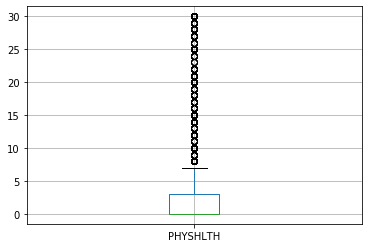

In [91]:
# descriptive statistics
print(df['PHYSHLTH'].describe())
df.boxplot(column='PHYSHLTH')

In [ ]:
# graphic showing those descriptive stats

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116416ba8>]],
      dtype=object)

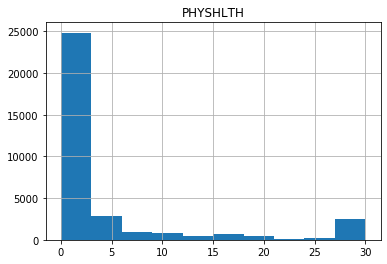

In [14]:
# graphic showing the distribution of data
df.hist(column='PHYSHLTH')

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [15]:
# code to calculate the average number of sick days by state
df.groupby('_STATE')['PHYSHLTH'].mean()

_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

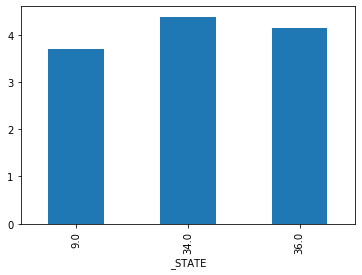

In [94]:
# code to graph those averages using matplotlib
df.groupby('_STATE')['PHYSHLTH'].mean().plot(kind='bar')

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [95]:
# code to create new colum for chronically sick
df['PHYSHLTH'].value_counts()
def Chronic(row):
    if row['PHYSHLTH']>=20.0:
        return True
    else: return False
df.apply (lambda row: Chronic(row), axis=1)
df['Chronic']= df.apply (lambda row: Chronic(row), axis=1)
df['Chronic']

49938     False
49939     False
49940     False
49941     False
49942     False
49943     False
49944     False
49945     False
49946      True
49947     False
49948     False
49949     False
49950     False
49951     False
49952     False
49953     False
49954     False
49955      True
49956     False
49957     False
49958     False
49959     False
49960     False
49961     False
49962     False
49963     False
49964     False
49965     False
49966     False
49967     False
          ...  
303749    False
303750    False
303751     True
303752    False
303753    False
303754    False
303755    False
303756    False
303757    False
303758    False
303759    False
303760    False
303761    False
303762    False
303763    False
303764    False
303765    False
303766    False
303767    False
303768    False
303769    False
303770    False
303771    False
303772    False
303773    False
303774    False
303775    False
303776    False
303777    False
303778    False
Name: Chronic, Length: 3

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [96]:
# code to calculate averages per state
df.groupby('_STATE')['Chronic'].mean()

_STATE
9.0     0.083019
34.0    0.103946
36.0    0.091191
Name: Chronic, dtype: float64

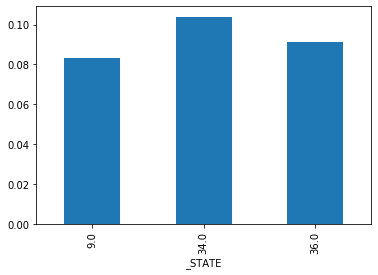

In [97]:
# create graphic to compare chronically sick by state
df.groupby('_STATE')['Chronic'].mean().plot(kind='bar')

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13c762518>]],
      dtype=object)

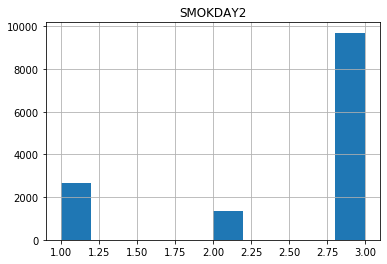

In [98]:

df['smoking'] = np.where(df['SMOKE100']==2, 3, df['SMOKDAY2'])
#print(df['SMOKDAY2'].value_counts())
#1
drop_rows = df[df['SMOKDAY2']==7].index
drop_rows2 = df[df['SMOKDAY2']==9].index
df.drop(drop_rows, inplace=True)
df.drop(drop_rows2, inplace=True)
df['SMOKDAY2'].value_counts()

#3
df['SMOKDAY2'].describe()
df.hist(column='SMOKDAY2')



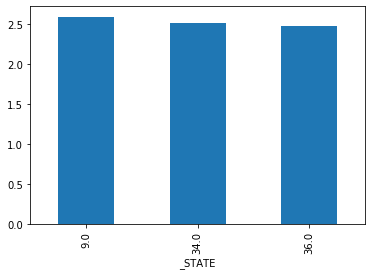

In [21]:
#4
df.groupby('_STATE')['SMOKDAY2'].mean()
df.groupby('_STATE')['SMOKDAY2'].mean().plot(kind='bar',)

## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

49938      4.35
49939     30.00
49941     13.05
49942      4.35
49943     17.40
49944     30.00
49945      4.00
49947      5.00
49949     30.00
49950     30.45
49952      5.00
49953     15.00
49954      2.00
49955      1.00
49956     30.45
49957     20.00
49959      3.00
49962     15.00
49963      2.00
49964     30.00
49965     30.45
49967     14.00
49970      7.00
49971      8.70
49972      1.00
49973     15.00
49974      7.00
49975     10.00
49976       NaN
49978     17.40
          ...  
303744     2.00
303745    13.05
303746     8.70
303747    21.75
303748     3.00
303749    20.00
303750     4.00
303751     3.00
303752     8.70
303753     2.00
303754     1.00
303755    15.00
303756     6.00
303757     7.00
303758    25.00
303759     5.00
303760    13.05
303761    10.00
303763     3.00
303764     2.00
303765    17.40
303768     1.00
303769     8.70
303770     2.00
303771     4.00
303772     4.00
303773     8.00
303774     3.00
303776     4.00
303778    30.00
Name: num_alc_days, Leng

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13c735f98>]],
      dtype=object)

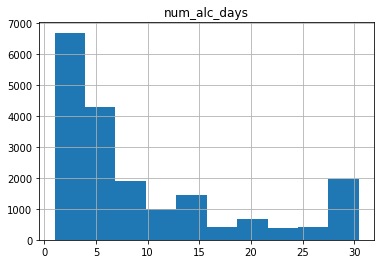

In [100]:
#1
df['ALCDAY5'].value_counts() 
drop_alc_777 = df[df['ALCDAY5']==777].index
drop_alc_888 = df[df['ALCDAY5']==888].index
drop_alc_999 = df[df['ALCDAY5']==999].index
df.drop(drop_alc_777, inplace=True)
df.drop(drop_alc_888, inplace=True)
df.drop(drop_alc_999, inplace=True)
df['ALCDAY5'].value_counts()

def alc(row):
    if row['ALCDAY5']>200:
        return row['ALCDAY5']-200
    if row['ALCDAY5']>100:
        return (row['ALCDAY5']-100)*4.35
df['num_alc_days'] = df.apply (lambda row: alc(row), axis=1)
print(df['num_alc_days'])
print(df['ALCDAY5'])

#3
df.hist(column='num_alc_days')






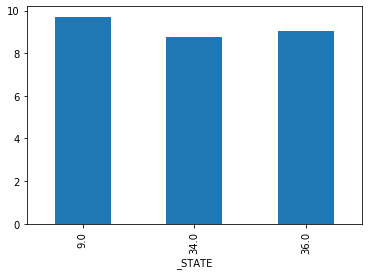

In [101]:
#4
df.groupby('_STATE')['num_alc_days'].mean().plot(kind='bar')

## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13b4dc0b8>]],
      dtype=object)

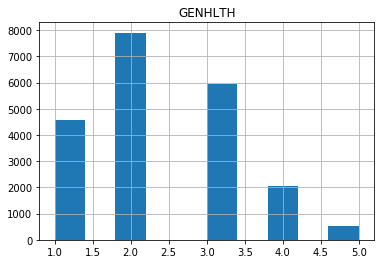

In [107]:
# your code here 
#health status (GENHLTH)
drop_hlth_7 = df[df['GENHLTH']==7].index
drop_hlth_9 = df[df['GENHLTH']==9].index
drop_hlth_blank = df[df['GENHLTH']=='BLANK'].index
df.drop(drop_hlth_7, inplace=True)
df.drop(drop_hlth_9, inplace=True)
df.drop(drop_hlth_blank, inplace=True)
df['GENHLTH'].value_counts()
df['GENHLTH'].describe()

df.hist(column='GENHLTH')

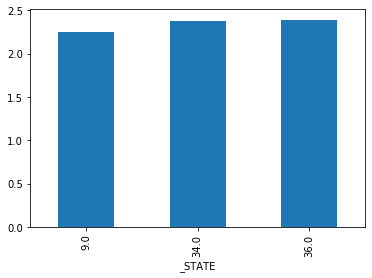

In [108]:

df.groupby('_STATE')['GENHLTH'].mean().plot(kind='bar',)

In [114]:
#diagnosed with angina or coronary heart disease (CVDCRHD4)
drop_heart_7 = df[df['CVDCRHD4']==7].index
drop_heart_9 = df[df['CVDCRHD4']==9].index
drop_heart_blank = df[df['CVDCRHD4']=='BLANK'].index
df.drop(drop_heart_7, inplace=True)
df.drop(drop_heart_9, inplace=True)
df.drop(drop_heart_blank, inplace=True)
df['CVDCRHD4'].value_counts()
df

AttributeError: 'DataFrame' object has no attribute 'bar'

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. 

2. 

3.  

## Bonus: Create some cool graphics.  